Install the dataset API

In [1]:
!pip install urbaning

ERROR: Could not find a version that satisfies the requirement urbaning (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for urbaning


Downloading the dataset

In [ ]:
from urbaning.data import download_dataset, download_one_sequence
download_dataset(download_dir="datasets/UrbanIng-V2X") # to download the entire dataset
download_one_sequence(download_dir="datasets/UrbanIng-V2X") # to download only one sequence for quick start purposes - optionally pass a sequence_name

Unzip the dataset

In [ ]:
from urbaning.data import unzip_dataset
unzip_dataset(dataset_folder="datasets/UrbanIng-V2X")
# If 7zip is not visible in the environment, pass also the sevenz_executable parameter

Accessing the dataset

In [1]:
from urbaning import Dataset

# root folder where the dataset is downloaded and unzipped
root_folder = "datasets/UrbanIng-V2X"
# load the complete dataset
dataset = Dataset(root_folder)
# number of total sequences
print(len(dataset))

34


Accessing a sequence

In [2]:
# use indexing from the dataset
index = 10
# a Sequence instance
print(type(dataset[index]))
# or simple iterate over the dataset
for sequence in dataset:
    print(sequence.sequence_name)
    break

# you can also load one sequence manually
from urbaning.data import Sequence
# sequence to load
sequence_name = "20241126_0017_crossing1_00"
# load the sequence
sequence = Sequence(root_folder, sequence_name)

<class 'urbaning.data.sequence.Sequence'>
20241126_0024_crossing1_18


Accessing a frame

In [3]:
# use indexing from the sequence
index = 115
# a Frame instance
print(type(sequence[index]))
# or simple iterate over the sequence
for frame in sequence:
    # this frame timestamp
    print(frame.timestamp)
    break

<class 'urbaning.data.frame.Frame'>
1732636213.0


Accessing a infrastructure data

In [4]:
# iterate over the dictionary of infrastructures in the frame
for crossing_name in frame.infrastructures:
    # access the infrastructure data
    infrastructure = frame.infrastructures[crossing_name]
    # a Infrastructure instance
    print(type(infrastructure))
    break


<class 'urbaning.data.infrastructure.Infrastructure'>


Accessing a vehicle data

In [5]:
# iterate over the dictionary of vehicles in the frame
for vehicle_name in frame.vehicles:
    # access the infrastructure data
    vehicle = frame.vehicles[vehicle_name]
    # a Vehicle instance
    print(type(vehicle))
    break

<class 'urbaning.data.vehicle.Vehicle'>


Accessing a camera data

<class 'urbaning.data.camera_data.CameraData'>


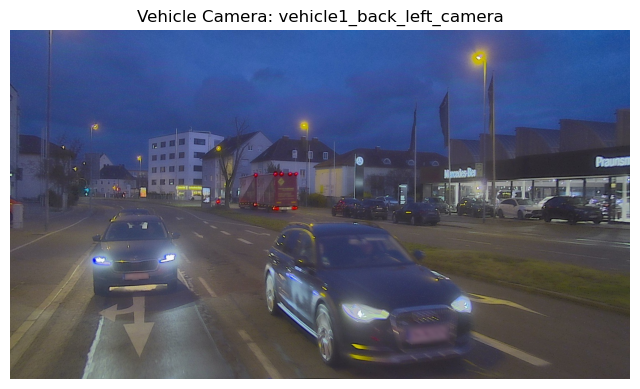

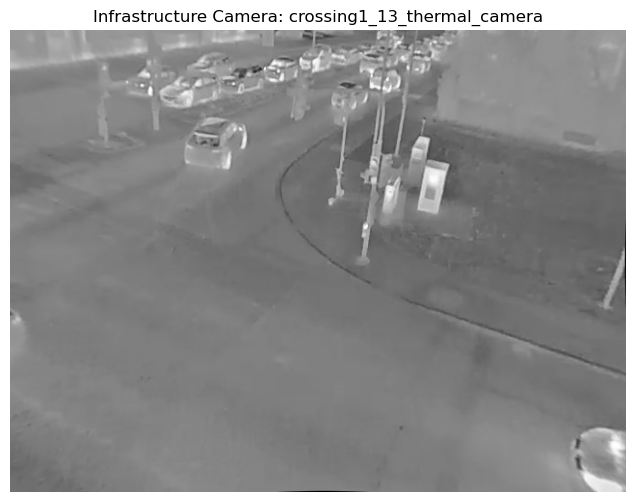

In [6]:
import cv2
import matplotlib.pyplot as plt
# iterate over the dictionary of cameras in the vehicle
for camera_name in vehicle.cameras:
    # access the camera data
    camera = vehicle.cameras[camera_name]
    # a CameraData instance
    print(type(camera))
    # access the image
    image = camera.undistorted_image
    # plot the image
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Vehicle Camera: {camera_name}")
    plt.axis('off')
    plt.show()
    break
    
# iterate over the dictionary of cameras in the infrastructure
for camera_name in infrastructure.cameras:
    # access the camera data
    camera = infrastructure.cameras[camera_name]
    # access the image
    image = camera.undistorted_image
    # plot the image
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Infrastructure Camera: {camera_name}")
    plt.axis('off')
    plt.show()
    break

Accessing a lidar data

<class 'urbaning.data.lidar_data.LidarData'>
(191780, 6)


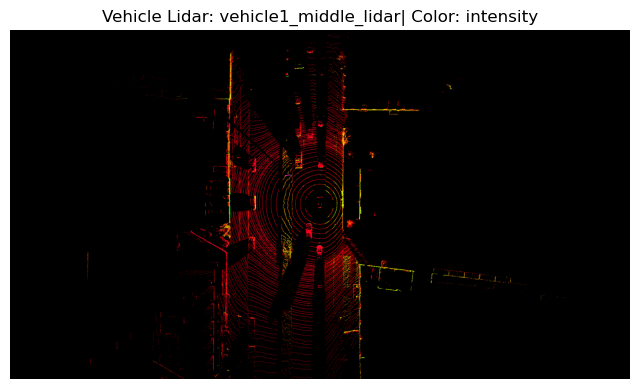

(120762, 6)


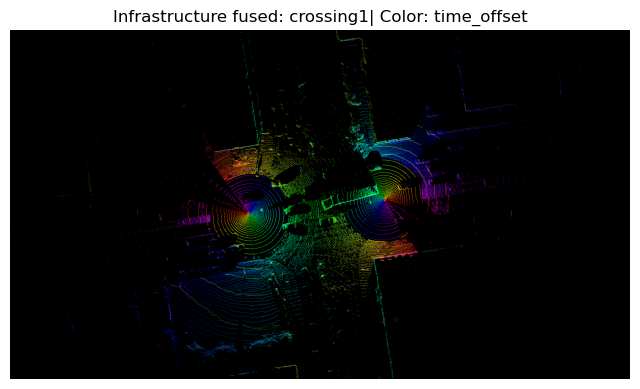

In [7]:
import cv2
import matplotlib.pyplot as plt
# BEVVisualizer to visualize lidar data
from urbaning.visualizer import BEVVisualizer
# iterate over the dictionary of lidars in the vehicle
for lidar_name in vehicle.lidars:
    # access the lidar data
    lidar = vehicle.lidars[lidar_name]
    # a LidarData instance
    print(type(lidar))
    # access the point cloud
    point_cloud = lidar.point_cloud_in_lidar_coordinates()
    # Number of points
    print(point_cloud.shape)

    # create BEVVisualizer
    visualizer = BEVVisualizer()
    visualizer.plot_point_cloud(point_cloud)
    image = visualizer.result()
    # plot the image
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Vehicle Lidar: {lidar_name}| Color: intensity")
    plt.axis('off')
    plt.show()
    break

# you can also get the complete point cloud of any source as you want also in any coordinate frame
point_cloud = infrastructure.fused_point_cloud_in_global_coordinates()
# Number of points
print(point_cloud.shape)
# create BEVVisualizer
visualizer = BEVVisualizer()
# time offset shows that different lidars rotate in different directions; also that same spot is observed at various time instances
visualizer.plot_point_cloud(point_cloud, color='time_offset')
image = visualizer.result()
# plot the image
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Infrastructure fused: {infrastructure.infrastructure_name}| Color: time_offset")
plt.axis('off')
plt.show()

Visualizing an entire frame

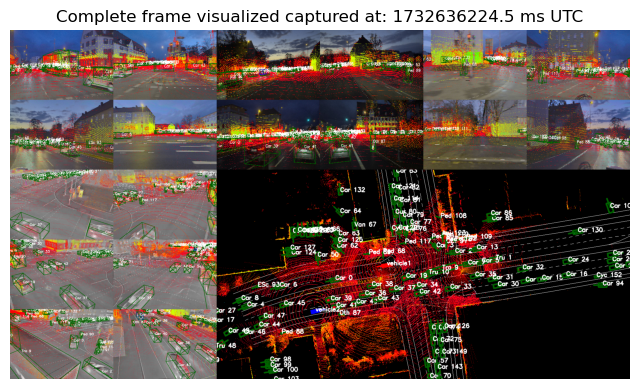

In [9]:
from urbaning.visualizer import FrameVisualizer

frame = sequence[index]
vis = FrameVisualizer()
vis.update_frame(frame)
vis.plot_camera_data()
vis.plot_lanelet_map(lanelet_map=sequence.lanelet_map)
vis.plot_point_cloud()
vis.plot_labels()
vis.plot_vehicles()
image = vis.result()
# plot the image
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Complete frame visualized captured at: {frame.timestamp} ms UTC")
plt.axis('off')
plt.show()